## **Data Analytics HW#7**
* **學號：R10546001**
* **姓名：許世佑**

### **Q1**

In [10]:
from PIL import Image
import numpy
from numpy import array
import numpy as np
from tkinter import _flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn import svm

In [11]:
image_matrix = np.zeros((400, 2576))
gender = np.array([])
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/ORL_Faces/%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        image_matrix[i+j*10] = image_array.flatten()
gender = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
gender = list(_flatten(gender))

In [12]:
X = image_matrix
y = gender

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalize
sc=StandardScaler()
sc.fit(X_train)
X_train_nor=sc.transform(X_train)
X_test_nor=sc.transform(X_test)

In [13]:
lr=LogisticRegression()
lr.fit(X_train_nor,y_train)
print("Accuracy of LR model: ",100*lr.score(X_test_nor, y_test),"%")

Accuracy of LR model:  96.25 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_nor,y_train)
print("Accuracy of KNN model: ",100*knn.score(X_test_nor, y_test),"%")

Accuracy of KNN model:  97.5 %


In [15]:
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_train,y_train)
print("Accuracy of SVM model: ",100*clf.score(X_test_nor, y_test),"%")

Accuracy of SVM model:  88.75 %


### **Q2**

In [16]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import math

In [17]:
lasso = Lasso(alpha = 0.001,normalize = True)
lasso.fit(X, y)

Lasso(alpha=0.001, normalize=True)

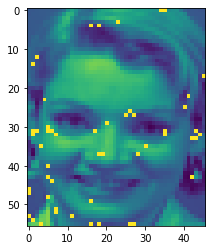

In [18]:
important_pixels = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        important_pixels.append(i)
image = Image.open(r"/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/ORL_Faces/1_1.png")
img_array = np.array(image)
for i in range(0, len(important_pixels)): #math.floor()
    col = math.floor(important_pixels[i]/46)
    row = important_pixels[i]-46*col
    #print("(",col,",", row,")")    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

In [19]:
X_important = np.zeros((400, len(important_pixels)))
X_important = X.T[important_pixels]
X_important = X_important.T

In [20]:
# Split data
X_important_train, X_important_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=1)

# Normalize
sc=StandardScaler()
sc.fit(X_important_train)
X_important_train_nor=sc.transform(X_important_train)
X_important_test_nor=sc.transform(X_important_test)

In [21]:
lr=LogisticRegression()
lr.fit(X_important_train_nor,y_train)
print("Accuracy of LR model: ",100*lr.score(X_important_test_nor, y_test),"%")

Accuracy of LR model:  97.5 %


In [22]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_important_train_nor,y_train)
print("Accuracy of KNN model: ",100*knn.score(X_important_test_nor, y_test),"%")

Accuracy of KNN model:  97.5 %


In [23]:
# Create LogisticRegression Model
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_important_train_nor,y_train)
print("Accuracy of SVM model: ",100*clf.score(X_important_test_nor, y_test),"%")

Accuracy of SVM model:  96.25 %


### **Q3**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
auto = pd.read_csv('/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/DA_Demo.csv')

In [3]:
# Create X and y
X = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
y = auto['origin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Create and fit the model
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Accuracy of LR model:', 100*lr_accuracy, '%')

Accuracy of LR model: 73.72881355932203 %


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [5]:
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
print('Accuracy of KNN model:', knn_accuracy)

Accuracy of KNN model: 0.6440677966101694


In [6]:
# Create and fit the model
svc = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svc.fit(X_train, y_train)

# Make predictions on the test set
svc_pred = svc.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_pred)
print('Accuracy of SVM model: ', svc_accuracy)

Accuracy of SVM model:  0.711864406779661
